In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# Panelized regression
- 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 제어하는 것. 선형 회귀의 경우 계수 즉 기울기의 크기를 작게 만든다.  


# Ridge regression

- 규제가 있는 선형 회귀 모델중 하나이며 선형 모델의 계수를 작게 만들어 과대 적합을 완화시킨다.계수의 제곱 기준 

In [4]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

#타겟
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)


scale = StandardScaler()
scale.fit(X_train_poly)

X_train_scaled = scale.transform(X_train_poly)
X_test_scaled = scale.transform(X_test_poly)

In [5]:
X_test_scaled.shape, X_train_scaled.shape

((14, 55), (42, 55))

In [6]:
X_test_scaled[:2]

array([[-2.29657672, -2.0645632 , -1.95288184, -1.55255604, -1.46585499,
        -1.45227925, -1.38306012, -1.36853915, -1.3414385 , -1.16487216,
        -1.12766176, -1.12993021, -1.09096504, -1.0919529 , -1.08681842,
        -1.05473034, -1.05422049, -1.04733556, -1.03445922, -0.95097661,
        -0.93581382, -0.94095847, -0.92003743, -0.92481854, -0.9257405 ,
        -0.90344054, -0.9076728 , -0.90768173, -0.90365223, -0.88585964,
        -0.88933355, -0.8882214 , -0.88265495, -0.87279092, -0.82345261,
        -0.81922614, -0.82441462, -0.81401521, -0.81951597, -0.82223805,
        -0.80760074, -0.81327179, -0.81584326, -0.81548696, -0.79980303,
        -0.80545985, -0.80768359, -0.80657966, -0.80223729, -0.79049072,
        -0.7959136 , -0.79756241, -0.7954801 , -0.78971903, -0.78033726],
       [-1.1967077 , -0.98223359, -0.85919166, -1.06961356, -0.99185789,
        -0.95563426, -0.92268296, -0.88613609, -0.84269005, -0.95543049,
        -0.92180981, -0.91161782, -0.8899864 , -0.

In [7]:
# from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)

Ridge()

In [8]:
print(model_ridge.score(X_train_scaled, y_train))
print(model_ridge.score(X_test_scaled, y_test))

0.9896101671037343
0.9790693977615376


In [9]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

1.0
-358.8506887360771


In [11]:
#기울기 - ridge
print(model_ridge.coef_)
print()
print(model_ridge.coef_.min(), model_ridge.coef_.max(), model_ridge.coef_.mean())

[18.75202605  9.99048537  9.64586193 17.278557   14.42089598 12.69251285
 12.34283964 10.88252862 12.55963482 12.93825844 12.67925897  9.12136175
 12.49327194  9.02641662  8.39716922 12.21409663  8.99564455  8.85968975
 11.68602892  7.48294042  8.98610839  3.37199818 10.27381252  4.61786228
  1.60700275 11.21975321  5.66171476  2.9808368   3.17359806 11.72544455
  6.40554378  4.19129005  5.06384222  8.89201309  1.89344091  4.81186299
 -2.91832747  7.38733861 -0.51038117 -5.91335297  9.5029666   1.56464851
 -3.66645267 -6.13031213 11.06068777  3.21356622 -1.71089861 -3.65107495
 -2.63704498 11.98418393  4.3636902  -0.11776857 -1.40420516  0.45174316
  5.29453248]

-6.130312126089967 18.752026049447746 6.427257142033708


- 다시 정리

#### ridge의 규제 정도 -> alpha=1.0 (default)
#### 1.0보다 작으면 약한 규제, 1.0보다 크면 강한 규제

In [12]:
#기울기 - linear
print(model_lr.coef_)
print()
print(model_lr.coef_.min(), model_lr.coef_.max(), model_lr.coef_.mean())

[  -589630.50555912     58882.34324788    292479.57446999
   3614696.51499939   2676387.96453904  -4179338.79211102
   1913385.14805076  -7462398.43053759   4644311.62244733
   1112036.2329462  -36636084.62113839   8265194.86369508
  10957185.9086208   44560029.65617242 -18234640.88350546
 -10575138.83793344   7800352.55775522 -11116646.1280095
   1508213.95269467  -2366902.41321752  32780600.20159113
  -7086929.28659834   6162417.13213452 -21442493.69811726
    958974.39042921  -6479999.31434503 -16087564.79973175
 -24612355.68442646  26477276.3381922   10193063.2388156
  -2161671.36555693  -1494714.79469453  18751463.02519272
 -11464734.53987009 -16778724.3728127   21634520.24520539
  17961770.24435099 -15580796.73043925  -3698271.6753593
   1658671.6770586  -22830888.63335693   4544534.35558397
 -20028332.95688947  -7658879.17778674  12298552.32201409
  34365168.3991784   14317535.6551806   -3335164.24741361
   5353004.99659064  -4052599.78988776  -8063366.76849126
 -10439620.506910

In [14]:
## alpha 값에 따른 점수 리스트
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    
    model_ridge = Ridge(alpha=a)
    
    model_ridge.fit(X_train_scaled, y_train)
    
    train_score.append(model_ridge.score(X_train_scaled, y_train))
    test_score.append(model_ridge.score(X_test_scaled, y_test))

In [15]:
alpha_list

[0.001, 0.01, 0.1, 1, 10, 100]

In [16]:
#학습 점수의 경우 alpha값이 낮으면 점수가 높아짐
alpha_list, train_score

([0.001, 0.01, 0.1, 1, 10, 100],
 [0.9930455252088376,
  0.9917809981250515,
  0.9903815817570366,
  0.9896101671037343,
  0.988728468997471,
  0.9841843235774494])

In [17]:
#테스트 점수의 경우 alpha값이 낮으면 점수가 낮아짐
alpha_list, test_score

([0.001, 0.01, 0.1, 1, 10, 100],
 [0.956938896147935,
  0.9800187936871864,
  0.9827976465386965,
  0.9790693977615376,
  0.9725329582461569,
  0.9627042641050291])

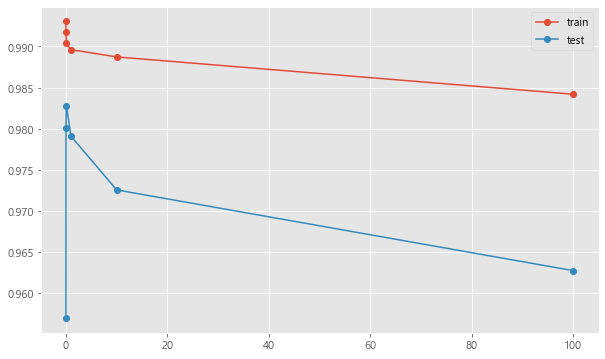

In [18]:
#시각화
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.legend()
plt.show()

#두 선 사이의 거리가 가장 짧은 곳이 최적의 alpha 값

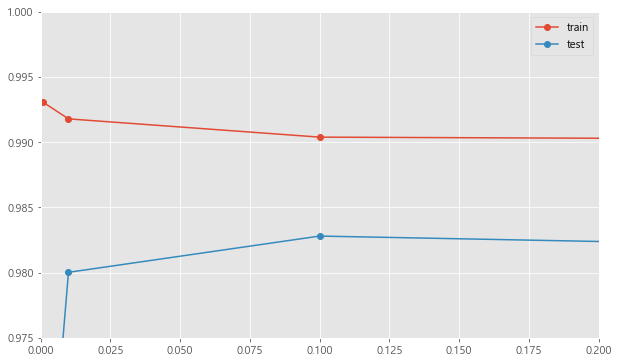

In [19]:
#시각화
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.xlim([0, .2])
plt.ylim([0.975, 1.0])
plt.legend()
plt.show()
#0.1이 최적

In [ ]:
## 그래프의 부분 확대

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
print(np.log10(alpha_list))
print(10**(np.log10(alpha_list)))

In [20]:
#쥬피터노트북의 숫자 옵션 변경
np.set_printoptions(precision=3, suppress=True)
10**(np.log10(alpha_list))

array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ])

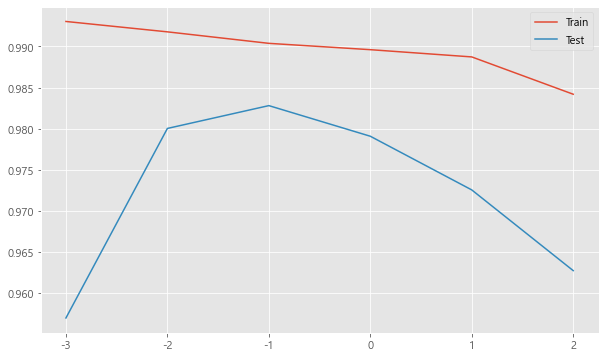

In [21]:
plt.plot(np.log10(alpha_list), train_score, label='Train')
plt.plot(np.log10(alpha_list), test_score, label='Test')
plt.legend()
plt.show()

In [22]:
#alpha 0.1로 다시 학습
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train_scaled, y_train)

print(model_ridge.score(X_train_scaled, y_train))
print(model_ridge.score(X_test_scaled, y_test))

0.9903815817570366
0.9827976465386965


In [23]:
model_ridge.coef_

array([ 27.619,  -1.64 , -19.733,  30.031,  16.998,  17.832,   4.469,
         3.873,  22.835,  19.504,  17.76 ,  14.531,  13.349,   7.573,
        19.257,   5.128,  -2.057,  10.624,  41.723,   5.907,  14.934,
        -0.451,  19.86 ,   1.271,  -1.007,  19.69 ,  -1.158,  -3.574,
        11.966,  13.685,  -8.417,  -9.979,   8.424,  45.515,  -6.238,
        13.361, -17.648,  28.236,  -6.566, -25.891,  37.379,  -0.398,
       -20.823, -23.806,  39.967,   0.106, -20.498, -21.747,  -4.126,
        35.392,  -5.592, -25.389, -23.94 ,  -1.892,  39.442])

In [24]:
model_ridge.coef_.min(), model_ridge.coef_.max(), model_ridge.coef_.mean()

(-25.8911581343702, 45.51544903428933, 6.466780797934581)

# 라쏘

In [25]:
# from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

Lasso()

In [26]:
print(model_lasso.score(X_train_scaled, y_train))
print(model_lasso.score(X_test_scaled, y_test))

0.989789897208096
0.9800593698421886


In [27]:
model_lasso.coef_

array([ 0.   ,  0.   ,  0.   , 95.612, 11.602,  0.   , 10.58 ,  0.   ,
       31.515,  0.   , 22.3  ,  0.   , 29.104,  0.   ,  0.   , 18.504,
        0.   ,  0.   , 41.937,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  5.748,  0.   ,  0.   ,  0.   , 20.534,  0.   ,  0.   ,
        0.   ,  8.878,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , 35.312,  0.   ,  0.   ,  0.   ,
        0.   , 21.359,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

## alpha 하이퍼파라미터 테스트

In [29]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    # 라쏘 모델 생성
    model_lasso = Lasso(alpha=a)
    # 라쏘 모델 훈련
    model_lasso.fit(X_train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(model_lasso.score(X_train_scaled, y_train))
    test_score.append(model_lasso.score(X_test_scaled, y_test))

In [30]:
#alpha값 1을 기준으로 낮을수록 학습점수가 올라감
print(alpha_list)
print()
print(train_score)

[0.001, 0.01, 0.1, 1, 10, 100]

[0.990856843502147, 0.9907921500205304, 0.990137631128448, 0.989789897208096, 0.9888067471131867, 0.9078632190121446]


In [31]:
#alpha값 1을 기준으로 낮을수록 학습점수가 올라감
print(alpha_list)
print()
print(test_score)

[0.001, 0.01, 0.1, 1, 10, 100]

[0.9836870822242813, 0.9836730006301536, 0.9819405116249363, 0.9800593698421886, 0.9824470598706695, 0.9089071866576978]


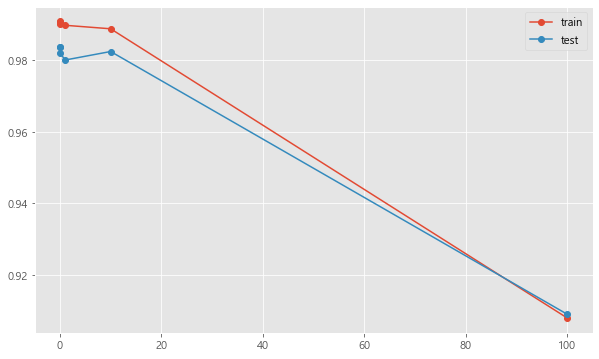

In [32]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.legend()
plt.show()

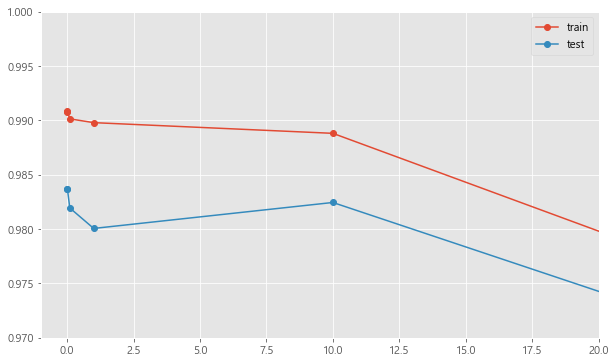

In [33]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.xlim([-1, 20])
plt.ylim([0.97, 1.0])
plt.legend()
plt.show()

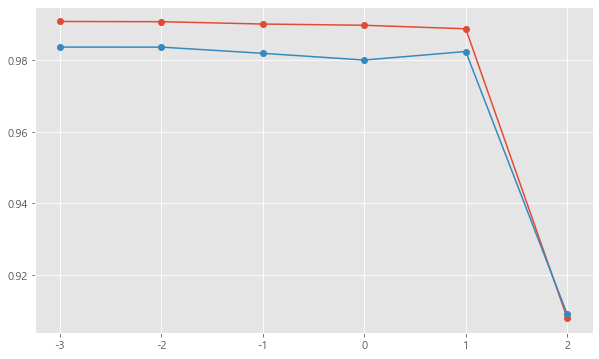

In [34]:
# np.log10() 이용 
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# 1일때 가장 점수 차이가 적게난다. = 10**(1)

plt.plot(np.log10(alpha_list), train_score, marker='o')
plt.plot(np.log10(alpha_list), test_score, marker='o')
plt.show()

In [35]:
#alpha=10 재적용
model_lasso2 = Lasso(alpha=10)
model_lasso2.fit(X_train_scaled, y_train)

print(model_lasso2.score(X_train_scaled, y_train))
print(model_lasso2.score(X_test_scaled, y_test))

0.9888067471131867
0.9824470598706695


In [36]:
model_lasso2.coef_

## 이게 뭘 의미하는데???

array([ 0.   ,  0.   ,  0.   , 12.149, 55.449, 42.231,  0.   ,  0.   ,
       13.706,  0.   , 43.219,  5.703, 47.463,  7.423, 11.858,  0.   ,
        0.   , 13.53 , 21.221,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   , 18.67 ,  0.   ,  0.   ,  0.   , 15.81 ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , 18.147,  0.   ,  0.   ,  0.   ,
        0.   , 15.513,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [37]:
#alpha=1
model_lasso.coef_

array([  0.   ,   0.   ,   0.   ,   0.   ,   0.503,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  81.72 , 167.246,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ])

In [38]:
print(np.sum(model_lasso2.coef_ == 0))

40


In [39]:
print(np.sum(model_lasso.coef_ == 0))

52


# 퀴즈 

- 성별 키와 몸무게(weight-height.csv) 데이타셋을 이용하여 선형, 다항적용, 릿지, 라쏘 모델별로 테스트하고 결과를 확인하여라. 

- Gender 컬럼 전처리

- 스케일링

- 몸무게는 파운드 단위 -> 1파운드 = 0.453592kg
- 키는 인치 단위 -> 1인치 = 2.54cm

In [50]:
#데이터셋 생성
df = pd.read_csv('~/dropbox/python숙달/data/weight-height.csv')
df_target = df['Gender']


In [46]:
df.shape

(10000, 3)

In [47]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [48]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


## Gender 컬럼 원핫인코딩

In [51]:
#  원핫인코딩으로 gender 컬럼 변경 
df = pd.get_dummies(df)
df.sample(5)

,Height,Weight,Gender_Female,Gender_Male
3908,69.842455,174.213404,0,1
8551,63.423372,129.921671,1,0
850,71.032385,186.762488,0,1
4608,72.430455,208.141537,0,1
6504,67.281358,151.006828,1,0


In [52]:
# model_ridge = Ridge(alpha=100)
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)
print(model_ridge.score(X_train_scaled, y_train), model_ridge.score(X_test_scaled, y_test))

0.9896101671037343 0.9790693977615376


In [53]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    model_ridge = Ridge(alpha=a)
    model_ridge.fit(X_train_scaled, y_train)
    train_score.append(model_ridge.score(X_train_scaled, y_train))
    test_score.append(model_ridge.score(X_test_scaled, y_test))
                                        
train_score, test_score 

([0.9930455252088376,
  0.9917809981250515,
  0.9903815817570366,
  0.9896101671037343,
  0.988728468997471,
  0.9841843235774494],
 [0.956938896147935,
  0.9800187936871864,
  0.9827976465386965,
  0.9790693977615376,
  0.9725329582461569,
  0.9627042641050291])

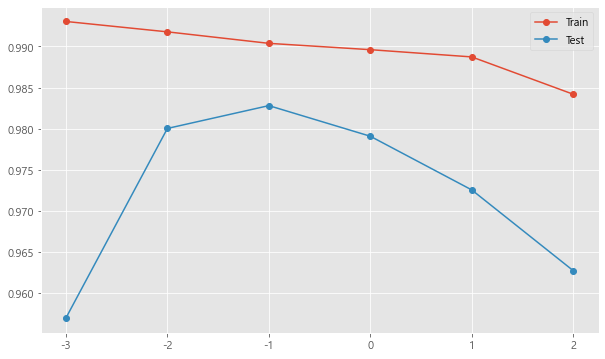

In [54]:
# np.set_printoptions(precision=3, suppress=True)
plt.plot(np.log10(alpha_list), train_score, label='Train', marker='o')
plt.plot(np.log10(alpha_list), test_score, label='Test', marker='o')
plt.legend()
plt.show()

In [55]:
# 거리 구하기 
np.array(train_score) - np.array(test_score)

array([0.036, 0.012, 0.008, 0.011, 0.016, 0.021])

In [56]:
np.sort(np.array(train_score) - np.array(test_score))

array([0.008, 0.011, 0.012, 0.016, 0.021, 0.036])

In [57]:
# model_ridge = Ridge(alpha=100)
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train_scaled, y_train)
print(model_ridge.score(X_train_scaled, y_train), model_ridge.score(X_test_scaled, y_test))

0.9903815817570366 0.9827976465386965


In [59]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)


Lasso()

In [60]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train_scaled, y_train)
    train_score.append(model_lasso.score(X_train_scaled, y_train))
    test_score.append(model_lasso.score(X_test_scaled, y_test))
                                        
train_score, test_score   

([0.9078632190121446,
  0.9078632190121446,
  0.9078632190121446,
  0.9078632190121446,
  0.9078632190121446,
  0.9078632190121446],
 [0.9089071866576978,
  0.9089071866576978,
  0.9089071866576978,
  0.9089071866576978,
  0.9089071866576978,
  0.9089071866576978])

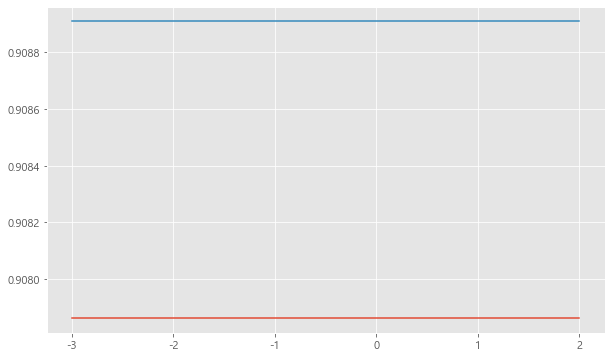

In [61]:
# np.set_printoptions(precision=3, suppress=True)
plt.plot(np.log10(alpha_list), train_score, label='Train')
plt.plot(np.log10(alpha_list), test_score, label='Test')
plt.show()

In [62]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)
print(model_lasso.score(X_train_scaled, y_train), model_lasso.score(X_test_scaled, y_test))

0.989789897208096 0.9800593698421886


In [63]:
model_lasso.coef_

array([ 0.   ,  0.   ,  0.   , 95.612, 11.602,  0.   , 10.58 ,  0.   ,
       31.515,  0.   , 22.3  ,  0.   , 29.104,  0.   ,  0.   , 18.504,
        0.   ,  0.   , 41.937,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  5.748,  0.   ,  0.   ,  0.   , 20.534,  0.   ,  0.   ,
        0.   ,  8.878,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , 35.312,  0.   ,  0.   ,  0.   ,
        0.   , 21.359,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [64]:
model_lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

# 로지스틱 회귀

- 시그모이드 함수 => 이진분류 
- 소프트맥스 함수 => 다중분류

## 시그모이드(sigmoid) 함수의 특징 
```
z 입력에 무엇이 들어가든 함수값이 (0,1)로 제한된다. 
중간 값은 0.5 이다.
매우 큰 값을 가지면 거의 1이며, 매우 작은 값을 가지면 거의 0이다.  
Binary classification에 적절한 함수이다. 
```

z = (회귀계수1*피처값1) + (회귀계수2*피처값2) + .... + 절편

- z를 확률로 변경하여 주는 함수가 시그모이드 함수

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/faaa0c014ae28ac67db5c49b3f3e8b08415a3f2b">

- z가 0이면 0.5. z가 어떤값이 되더라도 0~1사이의 범위가 된다. 

- 0.5를 기준으로 작으면 0 음성클래스, 크면 1 양성클래스 

- 시그모이드 그래프 
<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDA3MDdfMTgx/MDAxNTk0MTMwODg2NzAw.Bgt42rm3pV0xTPfuVjN1UbXw9HchDcAdLdvnsrAQvJ0g.ILAv2yJkoMXNiWHKAUe0QswJWyr84GwwlRbXwxCogKUg.PNG.zzoyou_/sigmoid.png?type=w800" width="50%">

In [65]:
#시그모이드 함수 구현
x = np.arange(-5, 5, 0.1)
y = 1 / (1 + np.exp(-x))

In [66]:
x[:5], y[:5]

(array([-5. , -4.9, -4.8, -4.7, -4.6]),
 array([0.007, 0.007, 0.008, 0.009, 0.01 ]))

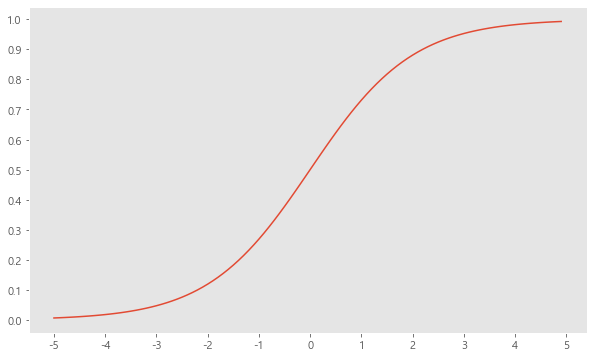

In [67]:
#시그모이드 시각화
plt.plot(x, y)
plt.yticks(np.arange(0, 1.1, step=0.1)) #y 눈금 설정
plt.xticks(np.arange(-5, 6)) #x 눈금 설정
plt.grid()
plt.show()

## 데이터 준비하기 - 이진분류용

In [68]:
wine_df = pd.read_csv('~/dropbox/python숙달/data/redwine.csv')
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [69]:
wine_df['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [70]:
#데이터 분리
X = wine_df[['alcohol','sugar','pH']]
y = wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

scale = StandardScaler()
scale.fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [71]:
X_train_scaled

array([[-1.163,  1.592, -1.731],
       [-0.496, -0.717, -0.047],
       [ 0.642, -0.24 ,  0.265],
       ...,
       [-0.413, -0.59 , -0.796],
       [ 1.919, -0.251,  2.198],
       [ 2.086, -0.526, -0.546]])

In [72]:
#로지스틱 모델 생성
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [73]:
#학습 데이터 라벨 5개
X_train_scaled[:5]

array([[-1.163,  1.592, -1.731],
       [-0.496, -0.717, -0.047],
       [ 0.642, -0.24 ,  0.265],
       [-1.246,  2.387,  0.14 ],
       [-0.33 ,  0.469, -0.733]])

In [74]:
y_train[:5]

5797    1.0
1532    0.0
6214    1.0
5150    1.0
4084    1.0
Name: class, dtype: float64

In [75]:
#실제 라벨
model_lr.predict(X_train_scaled[:5])

array([1., 1., 1., 1., 1.])

In [76]:
#라벨별 확률
model_lr.predict_proba(X_train_scaled[:5])

array([[0.006, 0.994],
       [0.415, 0.585],
       [0.172, 0.828],
       [0.007, 0.993],
       [0.051, 0.949]])

In [77]:
y_test

3933    1.0
2831    1.0
5218    1.0
5427    1.0
2800    1.0
       ... 
3842    1.0
5318    1.0
3136    1.0
5574    1.0
608     0.0
Name: class, Length: 1625, dtype: float64

In [78]:
#기울기(각 피처), 절편
model_lr.coef_, model_lr.intercept_

(array([[ 0.569,  1.679, -0.71 ]]), array([1.796]))

In [79]:
X_train_scaled[0]

array([-1.163,  1.592, -1.731])

In [80]:
#z값 구하기 1
#각 기울기 * 각 피처
#ax + b
np.sum(model_lr.coef_*X_train_scaled[0]) + model_lr.intercept_

array([5.038])

In [81]:
#z값 구하기 2 - 사이킷런 제공
#decision_function([X_train_scaled[0]])
decisions = model_lr.decision_function([X_train_scaled[0]])
decisions

array([5.038])

In [82]:
#predict_proba() 라벨의 확률
model_lr.predict_proba([X_train_scaled[0]])

array([[0.006, 0.994]])

In [83]:
y_train[0]

0.0

In [84]:
#시그모이드 함수 적용
#양성클래스의 확률값
z = model_lr.decision_function([X_train_scaled[0]])
1 / (1 + np.exp(-z))

array([0.994])

In [85]:
model_lr.predict_proba([X_train_scaled[0]])

array([[0.006, 0.994]])

In [86]:
model_lr.predict([X_train_scaled[0]])

array([1.])

- 1) 각 피처값, 각 피처값 기울기, 절편 -> z
- 2) z -> 시그모이드 함수 -> 1이 될 확률(p)
- 3) p값이 0.5보다 크면 1을 반환, 반대면 0 반환

# 로지스틱 회귀로 다중 분류 수행하기

## 소프트맥스 함수
- 0~1 사이의 확률값 (단, 결과 총합이 1이 된다)
- multinomial classification
- 라벨 분류값이 하나일 때 사용되는 시그모이드 함수를 라벨 분류값이 여러개일 때도 사용할 수 있도록 일반화 한 것이다

<img src='https://ichi.pro/assets/images/max/724/1*jf_Qr_etCPtIKq7NYa6F_w.png' width="50%">

In [87]:
## 데이터 준비하기

from sklearn.datasets import load_wine

In [88]:
wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [89]:
#데이터프레임화
wine_df2 = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
#y 라벨 컬럼 추가
wine_df2['target'] = wine_data.target
wine_df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [90]:
wine_df2['target'].unique()

array([0, 1, 2])

In [91]:
wine_df2['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [92]:
wine_df2.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [93]:
wine_df2.shape

(178, 14)

In [94]:
wine_df2.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [95]:
#데이터 분리
X = wine_df2.loc[:, :'proline']
y = wine_df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [96]:
#KNeighbors 모델 적용
model_kn = KNeighborsClassifier(n_neighbors=3)
model_kn.fit(X_train_scaled, y_train)

print(model_kn.score(X_train_scaled, y_train))
print(model_kn.score(X_test_scaled, y_test))

0.9774436090225563
0.9555555555555556


In [97]:
#DecisionTree 모델 적용
model_dt = DecisionTreeClassifier(random_state=11)
model_dt.fit(X_train_scaled, y_train)

print(model_dt.score(X_train_scaled, y_train))
print(model_dt.score(X_test_scaled, y_test))

1.0
0.9555555555555556


In [98]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

1.0
1.0


In [99]:
print(classification_report(y_test, model_lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [100]:
#타겟 확률
model_lr.predict_proba([X_test_scaled[0]])

array([[0.926, 0.073, 0.002]])

In [101]:
#실제 정답
y_test[35], y_test.to_numpy()[0]

(0, 0)

In [102]:
#타겟 라벨 확인
model_lr.classes_

array([0, 1, 2])

In [103]:
wine_df2.shape

(178, 14)

In [104]:
#기울기, 절편
#기울기 구조 -> (라벨수, 피처갯수), 절편 -> 라벨 수
model_lr.coef_.shape, model_lr.intercept_.shape

((3, 13), (3,))

In [105]:
model_lr.coef_

array([[ 0.72 ,  0.163,  0.467, -0.813,  0.081,  0.222,  0.7  , -0.105,
         0.138,  0.195,  0.088,  0.652,  0.919],
       [-0.842, -0.509, -0.789,  0.516, -0.123,  0.052,  0.188,  0.127,
         0.375, -1.021,  0.677, -0.113, -0.938],
       [ 0.121,  0.346,  0.322,  0.298,  0.042, -0.274, -0.888, -0.022,
        -0.513,  0.826, -0.766, -0.539,  0.019]])

In [106]:
#기울기 * 피처 + 절편
print(model_lr.coef_[0], X_test_scaled[0], model_lr.intercept_[0])
print()
print(model_lr.coef_[1], X_test_scaled[0], model_lr.intercept_[1])
print()
print(model_lr.coef_[2], X_test_scaled[0], model_lr.intercept_[2])


[ 0.72   0.163  0.467 -0.813  0.081  0.222  0.7   -0.105  0.138  0.195
  0.088  0.652  0.919] [ 0.641 -0.481  0.159  0.238  0.     0.665  1.034 -0.859  0.438  0.039
  0.401  1.282  0.568] 0.27640202887486226

[-0.842 -0.509 -0.789  0.516 -0.123  0.052  0.188  0.127  0.375 -1.021
  0.677 -0.113 -0.938] [ 0.641 -0.481  0.159  0.238  0.     0.665  1.034 -0.859  0.438  0.039
  0.401  1.282  0.568] 0.8734211654267957

[ 0.121  0.346  0.322  0.298  0.042 -0.274 -0.888 -0.022 -0.513  0.826
 -0.766 -0.539  0.019] [ 0.641 -0.481  0.159  0.238  0.     0.665  1.034 -0.859  0.438  0.039
  0.401  1.282  0.568] -1.1498231943016528


In [107]:
model_lr.predict(X_test_scaled)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1])

In [108]:
model_lr.predict(X_test_scaled)[0], y_test.to_numpy()[0]

(0, 0)

In [109]:
# z값 구하기 1
for i in range(3) :
    print(np.sum(model_lr.coef_[i]*X_test_scaled[0])+model_lr.intercept_[i])

2.9620370264190226
0.4156791279772686
-3.377716154396275


In [110]:
#z값 구하기 2
decision = model_lr.decision_function([X_test_scaled[0]])
#np.round(decision, decimals=2) -> 반올림
decision

array([[ 2.962,  0.416, -3.378]])

In [111]:
from scipy.special import softmax

decision = model_lr.decision_function([X_test_scaled[0]])

#라벨의 확률
proba = softmax(decision, axis=1)
np.round(proba, decimals=3)
proba

array([[0.926, 0.073, 0.002]])

In [112]:
#모델의 예측 확률
model_lr.predict_proba([X_test_scaled[0]])

array([[0.926, 0.073, 0.002]])

## softmax 2 - 소프트맥스 함수 공식에 의한 확률 구하기

In [113]:
#2차원
decision, decision.shape

(array([[ 2.962,  0.416, -3.378]]), (1, 3))

In [114]:
#1차원
decision[0]

array([ 2.962,  0.416, -3.378])

In [115]:
#np.exp(z값(라벨별)[0]) -> 분자
expL = np.exp(decision[0])
#sum(np.exp(z값(라벨별)[0])) -> 분모
sumExpL = sum(expL)

print(expL)
print(sumExpL)

result = []
for i in expL:
    result.append(i/sumExpL)

print('='*50)
print(result)

[19.337  1.515  0.034]
20.88684714350502
[0.9258133679240813, 0.07255281427218249, 0.0016338178037360977]


In [116]:
#array([[0.92581337, 0.07255281, 0.00163382]])

In [117]:
#함수 구현

def softmax2(L):
    expL = np.exp(L) 
    sumExpL = sum(expL) 
    result = []
    for i in expL:
        result.append(i/sumExpL) 
    return result

In [118]:
softmax2(decision[0])

[0.9258133679240813, 0.07255281427218249, 0.0016338178037360977]

# 퀴즈 

1) 아래의 주소를 이용하여 데이타셋을 생성하여라 

'https://bit.ly/fish_csv'

2) 물고기의 종류는 다음과 같다. 

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

도미(Bream) 와 빙어(Smelt) 만 추출하여 새로운 데이타셋 bream_smelt 을 생성하고 
이진분류 모델을 구축하고 테스트하여라 

3) 1의 데이타셋을 이용하여 다중 분류 모델을 구축하고 테스트하여라.


In [119]:
df_fish = pd.read_csv('https://bit.ly/fish_csv')
df_fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [120]:
df_fish.sample(5)

,Species,Weight,Length,Diagonal,Height,Width
82,Perch,110.0,21.0,22.5,5.6925,3.5550
110,Perch,556.0,34.5,36.5,10.2565,6.3875
132,Pike,430.0,38.0,40.5,7.2900,4.5765
15,Bream,600.0,32.0,37.2,15.4380,5.5800
129,Pike,300.0,34.0,37.8,5.7078,4.1580


In [121]:
df_fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [122]:
df_fish.value_counts()

Species    Weight  Length  Diagonal  Height   Width 
Bream      242.0   25.4    30.0      11.5200  4.0200    1
Pike       500.0   45.0    48.0      6.9600   4.8960    1
           200.0   32.3    34.8      5.5680   3.3756    1
           300.0   34.0    37.8      5.7078   4.1580    1
                   35.0    38.8      5.9364   4.3844    1
                                                       ..
Perch      85.0    20.0    21.0      5.0820   2.7720    1
           100.0   18.0    19.2      5.2224   3.3216    1
           110.0   21.0    22.5      5.6925   3.5550    1
                   22.0    23.5      5.5225   3.9950    1
Whitefish  1000.0  40.0    43.5      12.3540  6.5250    1
Length: 159, dtype: int64

In [123]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [124]:
df_fish.describe()
#Weight에 min값 0 존재 -> standardscaler 써야할 듯

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [125]:
df_fish.iloc[df_fish[df_fish['Weight'] == 0].index, :]['Weight']

40    0.0
Name: Weight, dtype: float64

In [126]:
mean_value = df_fish[df_fish['Species'] == 'Roach']['Weight'].mean()
mean_value

152.05

In [127]:
df_fish.iloc[df_fish[df_fish['Weight'] == 0].index, 1] = mean_value

In [128]:
# 도미(Bream) 와 빙어(Smelt) 만 추출
bream_smelt = df_fish[(df_fish['Species'] == 'Bream') | (df_fish['Species']== 'Smelt')]
bream_smelt.sample(5)

,Species,Weight,Length,Diagonal,Height,Width
22,Bream,620.0,34.5,39.7,15.5227,5.2801
19,Bream,650.0,33.5,38.7,14.4738,5.7276
9,Bream,500.0,30.7,36.2,14.2266,4.9594
150,Smelt,8.7,11.3,12.6,1.9782,1.2852
28,Bream,850.0,36.0,41.6,16.8896,6.1984


In [129]:
bream_smelt.shape

(49, 6)

In [130]:
fish_X = bream_smelt.loc[:, 'Weight':]
fish_target = bream_smelt[['Species']]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_target, random_state=42)

In [132]:
Scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [133]:
#C 값이 alpha에 해당. 디폴트 C=1
#C 값이 작으면 강한 규제
model_lr = LogisticRegression(C=1)
model_lr.fit(X_train_scaled, y_train)

print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

1.0
1.0


In [134]:
#성능 평가 지표
print(classification_report(y_test, model_lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
       Smelt       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [135]:
y_test[:5]

,Species
13,Bream
155,Smelt
157,Smelt
154,Smelt
17,Bream


In [136]:
model_lr.predict(X_test_scaled[:5])

array(['Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [137]:
#전체 물고기 데이터
fish_X = df_fish.loc[:, 'Weight':]
fish_target = df_fish[['Species']]
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_target, random_state=42)

scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# model_lr2 = LogisticRegression(C=100)
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_scaled, y_train)
model_lr2.fit(X_test_scaled, y_test)

LogisticRegression()

In [138]:
print(model_lr2.score(X_train_scaled, y_train))
print(model_lr2.score(X_test_scaled, y_test))

0.7394957983193278
0.8
